# Applied Statistics

In [20]:
# Import required libraries

# https://numpy.org/doc/stable/
import numpy as np

# https://matplotlib.org/
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Use ggplot style

import math

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

[Lady Tasting tea experiment - Numberphile](https://www.youtube.com/watch?v=8ERFV7rV0vg)

[Lady Tasting tea experiment - Rob Sinn](https://www.youtube.com/watch?v=kR1qeXDwCSc) 

[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) came up with the [null hypothesisis?](https://www.geeksforgeeks.org/maths/null-hypothesis/) 

Statistical analysis of A/B tests.

We can shuffle using numpy `shuffle` function ([see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)).

In [21]:
# Create a numpy array using values from 1 to 12
array = np.arange(12)

# Shuffle the array
np.random.shuffle(array)

# Print the array
array

array([ 5, 11,  8,  9,  0,  3,  4, 10,  2,  7,  1,  6])

<BarContainer object of 12 artists>

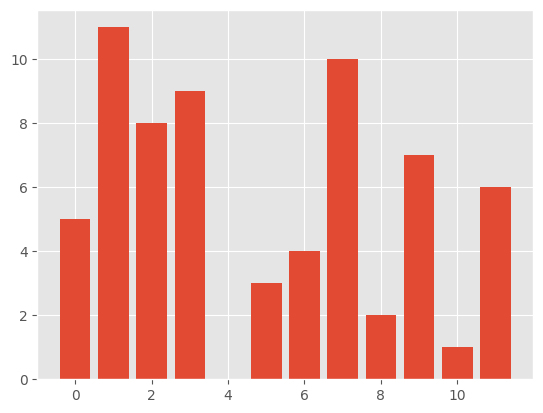

In [22]:
# Create a bar plot of the array
plt.bar(range(len(array)), array)

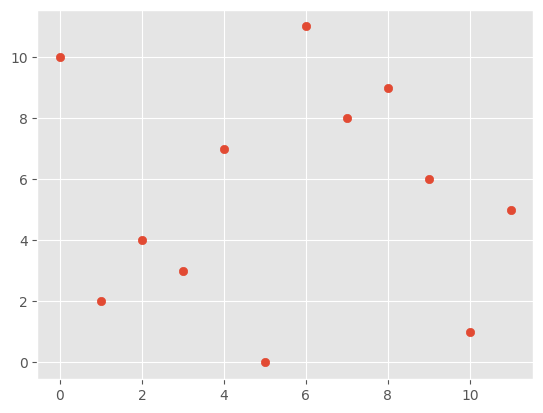

In [23]:
# Create numpy arrays
X = np.arange(12)
y = np.arange(12)

# Shuffle the arrays
np.random.shuffle(X)
np.random.shuffle(y)

# Create scatter plot 
plt.scatter(X, y)

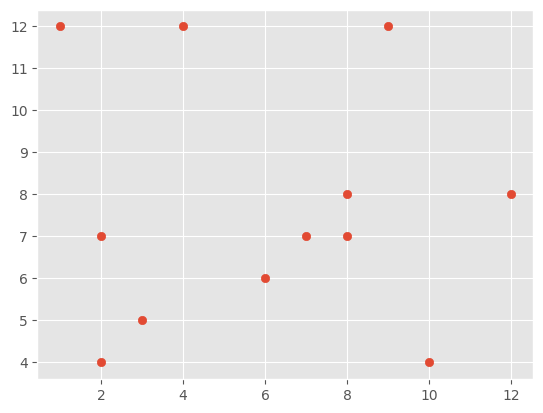

In [24]:
# Create random arrays of values from 1 to 12
X = np.random.choice(np.arange(1, 13), size=12, replace=True)
y = np.random.choice(np.arange(1, 13), size=12, replace=True)

# Create scatter plot 
plt.scatter(X, y)

[Generator shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)

p-value described [here](https://www.geeksforgeeks.org/machine-learning/p-value/)

`In general, a small p-value indicates that the observed data is unlikely to have occurred by random chance alone, which leads to the rejection of the null hypothesis.`

In [25]:
# Define the number of cups
number_of_cups = 12

# Define the number of cups with milk first
number_of_cups_milk_first = 4

# Define the number of cups with tea first
number_of_cups_tea_first = 8




We need to make an array or something so numpy can shuffle it.

In [26]:
# Create and array
cups = ['milk first'] * number_of_cups_milk_first + ['tea first'] * number_of_cups_tea_first

# print the array
cups

['milk first',
 'milk first',
 'milk first',
 'milk first',
 'tea first',
 'tea first',
 'tea first',
 'tea first',
 'tea first',
 'tea first',
 'tea first',
 'tea first']

In [27]:
# Shuffle the arrays
np.random.shuffle(cups)

# Print the array
cups

['milk first',
 'tea first',
 'milk first',
 'tea first',
 'tea first',
 'tea first',
 'milk first',
 'tea first',
 'tea first',
 'tea first',
 'tea first',
 'milk first']

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

We will select 4 cups from the 12.

If there are 12 cups of tea, how many different ways are there of selecting 4 cups from them? "binomial coefficient? use `math.comb()`

https://www.geeksforgeeks.org/maths/n-choose-k-formula/

`Combination is described as the process of choosing one, two, or a few elements from a given sequence, independent of the order in which they appear.`

So Order doesnt matter

But you cant pick the same cup more than once in this experiment.


So if we have 1 2 3 4 5 6 7 8 9 10 11 12 

and pick four for exaplme like this 2 5 7 8, its the same as 5 7 2 8 as order doesn matter

but if we select one, then there is 11 other cups to choose from then , not 12 any more

C(n,k)= n!/(k!(n−k)!)​
 
- n! is the factorial of n.
- k! is the factorial of k.


Putting that into Python code:

In [28]:
# Pick some xxample values
n = 12  # Total number of elements
k = 4   # Number of elements to choose

# Calculate the number of ways of selecting k objects from n without replacement and without order
result = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Print result
result

495

We can use the [math](https://docs.python.org/3/library/math.html) lirary, specifically the [comb](https://docs.python.org/3/library/math.html#math.comb) function to do this for us.

In [29]:
# Calculate combinations using math.comb
result = math.comb(n, k)

# Print result
print(f"The number of ways to choose {k} elements from {n} is: {result}")

The number of ways to choose 4 elements from 12 is: 495


## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

How to generate random numbers following a Normal Distribution using the numpy.random.normal() method:

- https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/

Offical nupmy documentation found [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [30]:
# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=None)

samples

0.3931790884714323

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.10682091, -0.08682091, -0.06682091, -0.04682091, -0.02682091,
        -0.00682091,  0.01317909,  0.03317909,  0.05317909,  0.07317909,
         0.09317909,  0.11317909,  0.13317909,  0.15317909,  0.17317909,
         0.19317909,  0.21317909,  0.23317909,  0.25317909,  0.27317909,
         0.29317909,  0.31317909,  0.33317909,  0.35317909,  0.37317909,
         0.39317909,  0.41317909,  0.43317909,  0.45317909,  0.47317909,
         0.49317909,  0.51317909,  0.53317909,  0.55317909,  0.57317909,
         0.59317909,  0.61317909,  0.63317909,  0.65317909,  0.67317909,
         0.69317909,  0.71317909,  0.73317909,  0.75317909,  0.77317909,
         0.79317909,  0.81317909,  0.83317909,  0.85317909,  0.87317909,
         0.89317909]),
 <BarContainer object

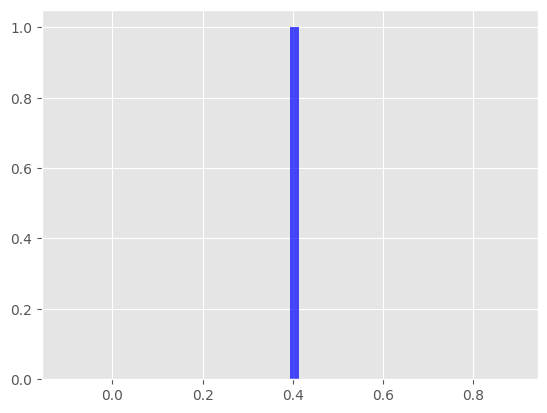

In [31]:
# plot the distribution 
plt.hist(samples, bins=50, color='blue', alpha=0.7)


From the docs:
```
loc: Mean (“centre”) of the distribution.

scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.

size: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
```

In [32]:
# we have to give it a size, a 2-d array
num_samples = 100000
sample_size = 10

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(num_samples, sample_size))

samples

array([[ 0.54194615,  0.80540174, -0.11939453, ...,  0.944866  ,
        -0.0073994 ,  0.29518187],
       [-0.90692646,  0.11247479, -1.39385822, ...,  1.29524317,
        -0.7529644 , -0.63207853],
       [-0.00743207,  0.70623791,  0.6799514 , ...,  1.05465264,
         1.0077798 , -0.29247381],
       ...,
       [-1.26995613, -0.64890851,  0.68573458, ...,  1.5171288 ,
        -0.41037753, -0.04832432],
       [ 1.34161341, -0.64146714, -1.57494226, ..., -0.1411865 ,
        -1.9195189 , -0.70390484],
       [ 1.68731438, -0.46098907, -0.78109899, ..., -0.42317455,
        -0.68575858,  0.34686925]])

(array([[1.0000e+00, 8.2000e+01, 1.4810e+03, 1.0796e+04, 3.1464e+04,
         3.6501e+04, 1.6547e+04, 2.9110e+03, 2.1400e+02, 3.0000e+00],
        [2.0000e+00, 8.3000e+01, 1.4540e+03, 1.0803e+04, 3.1725e+04,
         3.6337e+04, 1.6421e+04, 2.9500e+03, 2.1700e+02, 8.0000e+00],
        [1.0000e+00, 8.1000e+01, 1.5210e+03, 1.0651e+04, 3.1867e+04,
         3.6426e+04, 1.6309e+04, 2.9360e+03, 2.0400e+02, 4.0000e+00],
        [2.0000e+00, 8.4000e+01, 1.3760e+03, 1.0770e+04, 3.1439e+04,
         3.6538e+04, 1.6582e+04, 2.9990e+03, 2.0800e+02, 2.0000e+00],
        [3.0000e+00, 6.1000e+01, 1.4770e+03, 1.0726e+04, 3.1615e+04,
         3.6599e+04, 1.6506e+04, 2.8160e+03, 1.8900e+02, 8.0000e+00],
        [1.0000e+00, 7.7000e+01, 1.5210e+03, 1.0778e+04, 3.1663e+04,
         3.6639e+04, 1.6170e+04, 2.9500e+03, 1.9600e+02, 5.0000e+00],
        [0.0000e+00, 6.6000e+01, 1.4720e+03, 1.0887e+04, 3.1671e+04,
         3.6445e+04, 1.6427e+04, 2.8250e+03, 2.0300e+02, 4.0000e+00],
        [0.0000e+00, 7.0000

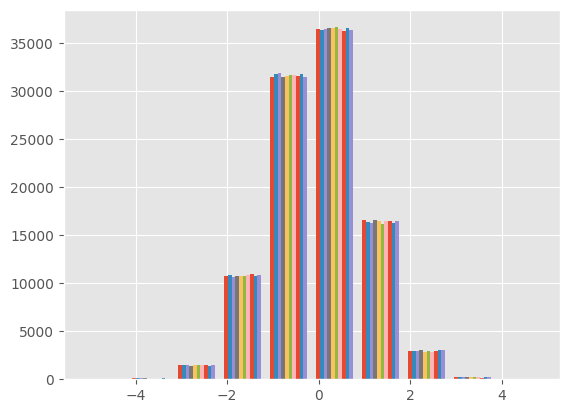

In [33]:
# plot the distribution 
plt.hist(samples)

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference `d = 0, 0.1, 0.2, … , 1.0`, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean `d` and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
Record the proportion of times the null hypothesis is not rejected.
3. Plot this proportion against `d`, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

***

END